In [10]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # For linear regression

In [11]:
# Load the datasets
demographics = pd.read_csv('Assignment02_dataset/dataset1.csv')  # Demographics data
screen_time = pd.read_csv('Assignment02_dataset/dataset2.csv')  # Screen time data
well_being = pd.read_csv('Assignment02_dataset/dataset3.csv')  # Well-being data

In [12]:
# Merge datasets on ID
merged_data = demographics.merge(screen_time, on='ID').merge(well_being, on='ID')

In [13]:
# Check for missing values
print("Missing values in the dataset:")
print(merged_data.isnull().sum())

Missing values in the dataset:
ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64


In [14]:
# Rename the columns for better readability
merged_data = merged_data.rename(columns={
    'C_we': 'Computer_Weekends',
    'C_wk': 'Computer_Weekdays',
    'G_we': 'Gaming_Weekends',
    'G_wk': 'Gaming_Weekdays',
    'S_we': 'Smartphone_Weekends',
    'S_wk': 'Smartphone_Weekdays',
    'T_we': 'TV_Weekends',
    'T_wk': 'TV_Weekdays',
    'gender': 'Gender',
    'minority': 'Minority_Status',
    'deprived': 'Deprivation_Status',
    'Optm': 'Optimistic',
    'Usef': 'Feeling_Useful',
    'Relx': 'Feeling_Relaxed',
    'Intp': 'Interested_in_People',
    'Engs': 'Energy_to_Spare',
    'Dealpr': 'Dealing_with_Problems',
    'Thkclr': 'Thinking_Clearly',
    'Goodme': 'Feeling_Good_about_Myself',
    'Clsep': 'Feeling_Close_to_Others',
    'Conf': 'Feeling_Confident',
    'Mkmind': 'Making_My_Own_Mind',
    'Loved': 'Feeling_Loved',
    'Intthg': 'Interested_in_New_Things',
    'Cheer': 'Feeling_Cheerful'
})

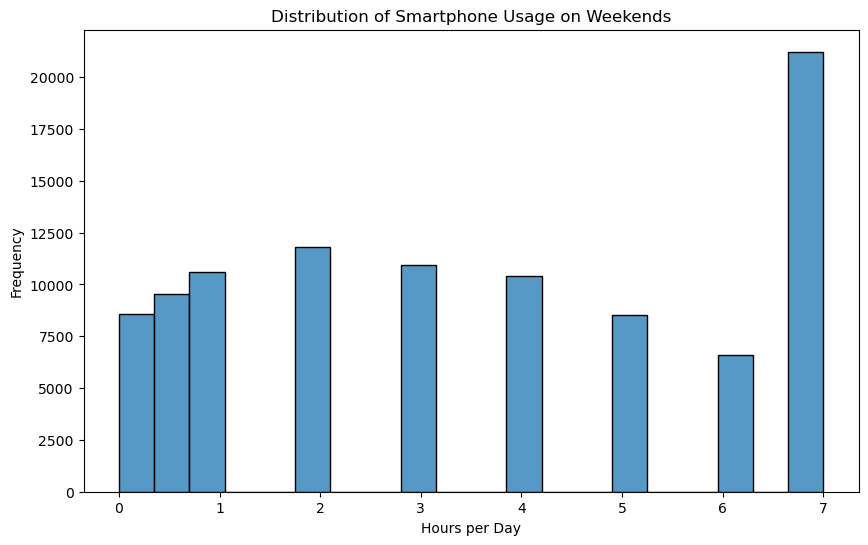

In [15]:
# Investigation 1: Histogram for Smartphone Usage on Weekends
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Smartphone_Weekends', bins=20)
plt.title('Distribution of Smartphone Usage on Weekends')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Check correlation between Computer Usage and Feeling Confident
corr1 = merged_data['Computer_Weekdays'].corr(merged_data['Feeling_Confident'])
print(f'Correlation between Computer Usage (Weekdays) and Feeling Confident: {corr1}')

Correlation between Computer Usage (Weekdays) and Feeling Confident: -0.05620981727909269


In [17]:
# Investigation 2: Linear Regression for Computer Usage (Weekdays) vs. Feeling Confident
X1 = merged_data[['Computer_Weekdays']]  # Independent variable
y1 = merged_data['Feeling_Confident']    # Dependent variable

In [18]:
X1 = sm.add_constant(X1)  # Add a constant to the model
model1 = sm.OLS(y1, X1).fit()  # Fit the linear regression model
print("Linear Regression Results for Computer Usage vs. Feeling Confident:")
print(model1.summary())  # Display regression results

Linear Regression Results for Computer Usage vs. Feeling Confident:
                            OLS Regression Results                            
Dep. Variable:      Feeling_Confident   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     311.5
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.32e-69
Time:                        00:47:49   Log-Likelihood:            -1.5003e+05
No. Observations:               98278   AIC:                         3.001e+05
Df Residuals:                   98276   BIC:                         3.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

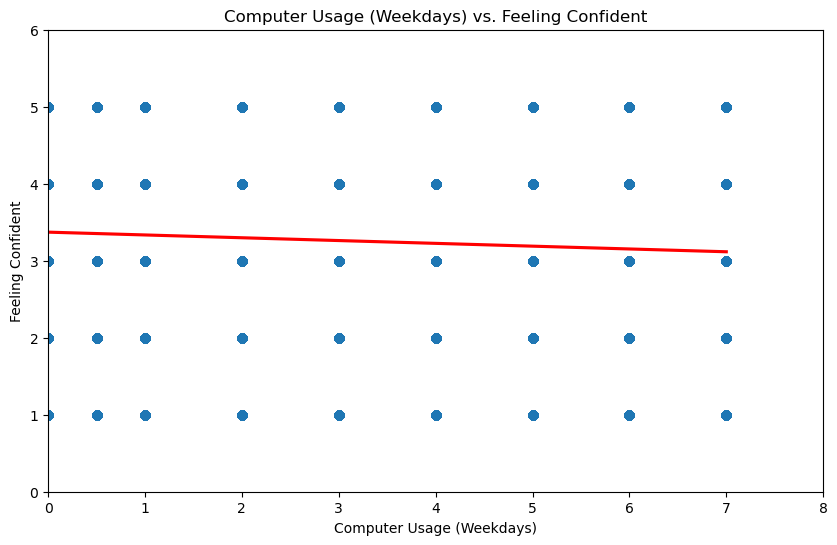

In [19]:
# Plot the regression line for Computer Usage vs. Feeling Confident with adjusted limits
plt.figure(figsize=(10, 6))
sns.regplot(x='Computer_Weekdays', y='Feeling_Confident', data=merged_data, ci=None, line_kws={"color": "red"})
plt.title('Computer Usage (Weekdays) vs. Feeling Confident')
plt.xlabel('Computer Usage (Weekdays)')
plt.ylabel('Feeling Confident')
plt.xlim(0, merged_data['Computer_Weekdays'].max() + 1)  # Adjust x-axis limit
plt.ylim(0, merged_data['Feeling_Confident'].max() + 1)  # Adjust y-axis limit
plt.show()

In [20]:
# Check correlation between TV Usage and Feeling Good about Myself
corr2 = merged_data['TV_Weekdays'].corr(merged_data['Feeling_Good_about_Myself'])
print(f'Correlation between TV Usage (Weekdays) and Feeling Good about Myself: {corr2}')

Correlation between TV Usage (Weekdays) and Feeling Good about Myself: -0.07654548393016072


In [21]:
# Investigation 3: Linear Regression for TV Usage (Weekdays) vs. Feeling Good about Myself
X2 = merged_data[['TV_Weekdays']]  # Independent variable
y2 = merged_data['Feeling_Good_about_Myself']  # Dependent variable

In [22]:
X2 = sm.add_constant(X2)  # Add a constant to the model
model2 = sm.OLS(y2, X2).fit()  # Fit the linear regression model
print("Linear Regression Results for TV Usage vs. Feeling Good about Myself:")
print(model2.summary())  # Display regression results

Linear Regression Results for TV Usage vs. Feeling Good about Myself:
                                OLS Regression Results                               
Dep. Variable:     Feeling_Good_about_Myself   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     579.2
Date:                       Thu, 12 Sep 2024   Prob (F-statistic):          1.31e-127
Time:                               00:47:50   Log-Likelihood:            -1.5076e+05
No. Observations:                      98278   AIC:                         3.015e+05
Df Residuals:                          98276   BIC:                         3.015e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

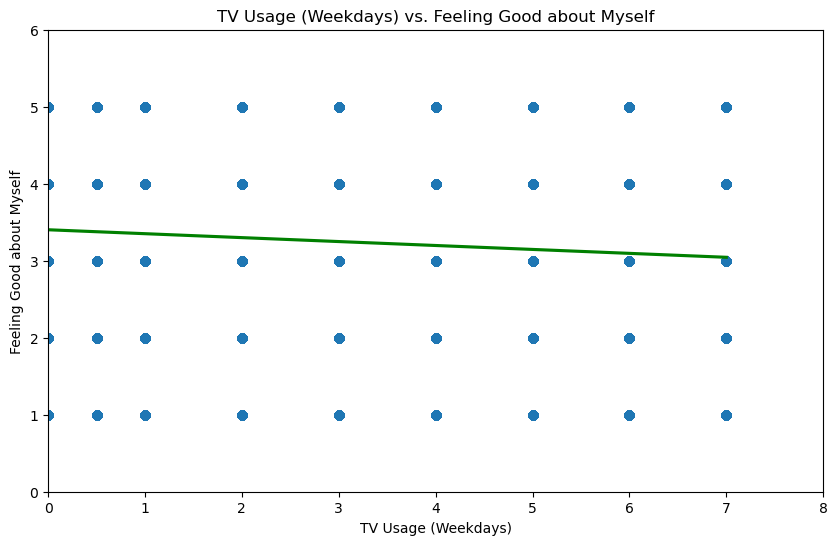

In [23]:
# Plot the regression line for TV Usage vs. Feeling Good about Myself with adjusted limits
plt.figure(figsize=(10, 6))
sns.regplot(x='TV_Weekdays', y='Feeling_Good_about_Myself', data=merged_data, ci=None, line_kws={"color": "green"})
plt.title('TV Usage (Weekdays) vs. Feeling Good about Myself')
plt.xlabel('TV Usage (Weekdays)')
plt.ylabel('Feeling Good about Myself')
plt.xlim(0, merged_data['TV_Weekdays'].max() + 1)  # Adjust x-axis limit
plt.ylim(0, merged_data['Feeling_Good_about_Myself'].max() + 1)  # Adjust y-axis limit
plt.show()

C:\Users\itsme\AppData\Local\Temp\ipykernel_10660\2315367058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deprivation_Status', y='Smartphone_Weekends', data=merged_data, palette="Set2")


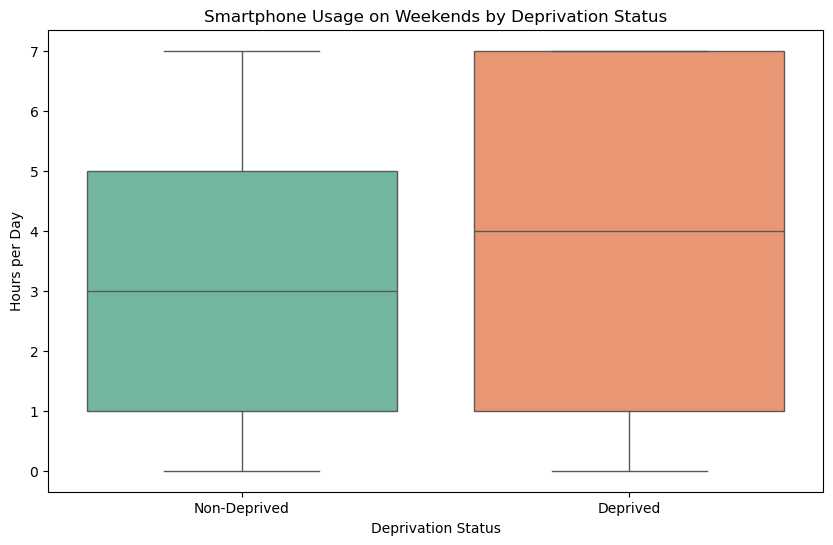

In [24]:
# Investigation 4: Box Plot for Smartphone Usage across Deprivation Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Deprivation_Status', y='Smartphone_Weekends', data=merged_data, palette="Set2")
plt.title('Smartphone Usage on Weekends by Deprivation Status')
plt.xlabel('Deprivation Status')
plt.ylabel('Hours per Day')
plt.xticks([0, 1], ['Non-Deprived', 'Deprived'])  # Rename x-axis ticks
plt.show()

In [49]:
from scipy import stats

In [50]:
# T-test for difference in smartphone usage between deprived and non-deprived
deprived = merged_data[merged_data['Deprivation_Status'] == 1]['Smartphone_Weekends']
non_deprived = merged_data[merged_data['Deprivation_Status'] == 0]['Smartphone_Weekends']


In [51]:
t_stat, p_val = stats.ttest_ind(deprived, non_deprived)
print(f"T-test results: t-stat = {t_stat}, p-value = {p_val}")

T-test results: t-stat = 25.621950926047838, p-value = 2.596355923964005e-144


In [45]:
from scipy import stats


In [46]:
# T-test for difference in smartphone usage between deprived and non-deprived
deprived = merged_data[merged_data['Deprivation_Status'] == 1]['Smartphone_Weekends']
non_deprived = merged_data[merged_data['Deprivation_Status'] == 0]['Smartphone_Weekends']


In [47]:
t_stat, p_val = stats.ttest_ind(deprived, non_deprived)
print(f"T-test results: t-stat = {t_stat}, p-value = {p_val}")

T-test results: t-stat = 25.621950926047838, p-value = 2.596355923964005e-144
